In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud 
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r'C:\Users\Kostas\Desktop\ai project\imdb_master.csv', encoding='latin1')



In [5]:
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [6]:
df.shape

(100000, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Text(0.5, 1.0, 'Sentiment distribution')

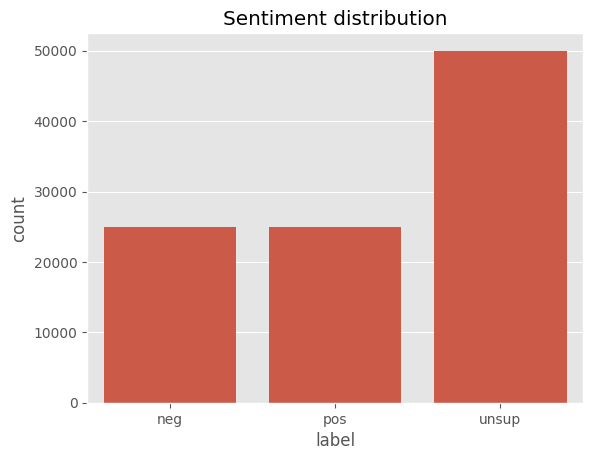

In [8]:
sns.countplot(x='label', data=df)
plt.title("Sentiment distribution")

In [9]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [10]:
df['word count'] = df['review'].apply(no_of_words)


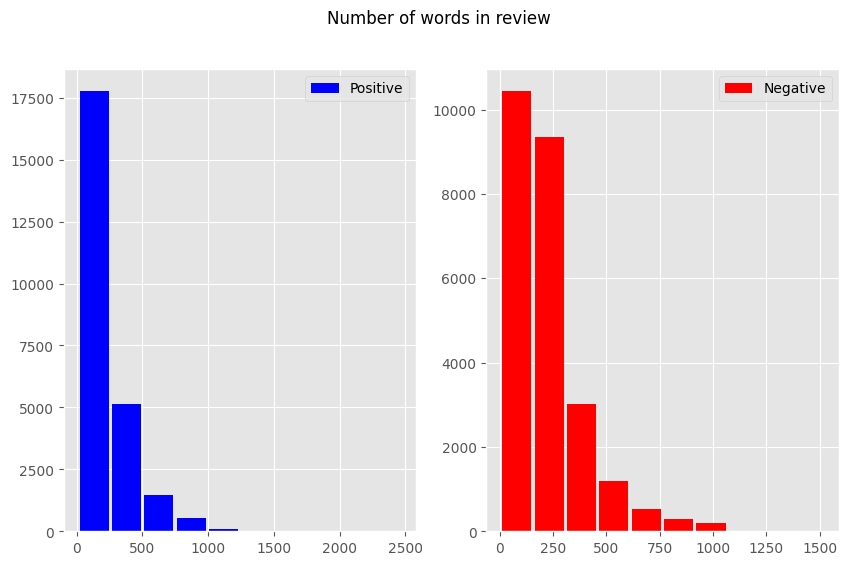

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['label'] == 'pos']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['label'] == 'neg']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [12]:
nltk.download('punkt')
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kostas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
df.review = df['review'].apply(data_processing)

In [14]:
df = df.drop_duplicates('review')

In [15]:
#The purpose of stemming is to simplify words to their common base, allowing for grouping together words that share a common root. For example running -> run
stemmer = PorterStemmer()
def stemming(data):
    return [stemmer.stem(word) for word in data]

df.review = df['review'].apply(lambda x: stemming(x))#apply the stemming function to each element in the 'review' column of a DataFrame


In [16]:
pos_reviews =  df[df.label == 'pos']
pos_reviews.head()

,Unnamed: 0,type,review,label,file,word count
12500,12500,test,"[w, e, n, t, , s, a, w, , m, o, v, i, e, , ...",pos,0_10.txt,152
12501,12501,test,"[a, c, t, o, r, , t, u, r, n, e, d, , d, i, ...",pos,10000_7.txt,344
12502,12502,test,"[r, e, c, r, e, a, t, i, o, n, a, l, , g, o, ...",pos,10001_9.txt,244
12503,12503,test,"[s, a, w, , f, i, l, m, , s, n, e, a, k, , ...",pos,10002_8.txt,124
12504,12504,test,"[b, i, l, l, , p, a, x, t, o, n, , t, a, k, ...",pos,10003_8.txt,205


In [18]:
from collections import Counter
import pandas as pd
import plotly.express as px

pos_reviews = pd.DataFrame({'review': [['good', 'movie', 'enjoyed'], ['great', 'acting', 'excellent']]})

count = Counter()
for words_list in pos_reviews['review'].values:
    for word in words_list:
        count[word] += 1

pos_words = pd.DataFrame(count.most_common(20))
pos_words.columns = ['word', 'count']

# Plot the bar chart
fig = px.bar(pos_words, x='count', y='word', title='Common words in positive reviews', color='word')
fig.show()



In [19]:
df = pd.read_csv(r'C:\Users\Kostas\Downloads\imdb_master.csv', encoding='latin1')



In [20]:
neg_reviews =  df[df.label == 'neg']
neg_reviews.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [21]:
from collections import Counter
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

neg_words = pd.DataFrame(count.most_common(20))
neg_words.columns = ['word', 'count']
neg_words.head()
px.bar(neg_words, x='count', y='word', title='Common words in negative reviews', color = 'word')


In [22]:
X = df['review']
Y = df['label']

In [23]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.3, random_state=42)

In [25]:
# Preprocess the data separately for training and testing sets
X_train = X_train.apply(data_processing)
X_test = X_test.apply(data_processing)

In [26]:
# Use TfidfVectorizer separately for training and testing sets
vect = TfidfVectorizer()
X_train_tfidf = vect.fit_transform(X_train)
X_test_tfidf = vect.transform(X_test)


In [27]:
# Train the LinearSVC model
from sklearn.calibration import LinearSVC


svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)


C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



LinearSVC()

In [28]:
# Save the SVM model
import joblib


joblib.dump(svc, 'svm_model.joblib')

['svm_model.joblib']

In [29]:
# Save the TfidfVectorizer
import pickle


with open('tfidf_vectorizer.pickle', 'wb') as handle:
    pickle.dump(vect, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
print("Size of x_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (70000,)
Size of y_train:  (70000,)
Size of x_test:  (30000,)
Size of y_test:  (30000,)


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [32]:

svc.fit(X_train_tfidf, y_train)
svc_pred = svc.predict(X_test_tfidf)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc * 100))

Test accuracy: 63.37%


In [34]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 3739   448  3353]
 [  350  4736  2429]
 [ 2521  1888 10536]]


              precision    recall  f1-score   support

         neg       0.57      0.50      0.53      7540
         pos       0.67      0.63      0.65      7515
       unsup       0.65      0.70      0.67     14945

    accuracy                           0.63     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.63      0.63      0.63     30000



In [35]:
import time

start_time = time.time()
svc.fit(X_train_tfidf, y_train)
end_time = time.time()
training_time = end_time - start_time

print("Training Time: {:.2f} seconds".format(training_time))

Training Time: 8.75 seconds


In [36]:
import random
import time
from sklearn.feature_extraction.text import TfidfVectorizer


num_samples = min(1000, X_test.shape[0])

# Generate random indices within the valid range
random_indices = random.sample(range(X_test.shape[0]), num_samples)
random_texts = X_test.iloc[random_indices]

# Load the TfidfVectorizer
with open('tfidf_vectorizer.pickle', 'rb') as handle:
    vect = pickle.load(handle)

# Vectorize the random texts
random_texts_tfidf = vect.transform(random_texts)

# Measure the prediction time for the 1000 samples
start_time = time.time()
svc.predict(random_texts_tfidf)
end_time = time.time()
prediction_time = (end_time - start_time) / num_samples

print("Prediction Time per Text: {:.6f} seconds".format(prediction_time))


Prediction Time per Text: 0.000002 seconds


In [37]:
# Μετατροπή των ετικετών σε αριθμητική μορφή
train_labels = df['label'].map({'pos': 1, 'neg': 0})
test_labels = df['label'].map({'pos': 1, 'neg': 0})

# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'])
X_train_nn = tokenizer.texts_to_sequences(df['review'])
X_test_nn = tokenizer.texts_to_sequences(df['review'])
X_train_nn = pad_sequences(X_train_nn)
X_test_nn = pad_sequences(X_test_nn)

nn_model = Sequential()
nn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train_nn.shape[1]))
nn_model.add(Flatten())
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Μέτρηση του χρόνου εκπαίδευσης για το νευρωνικό δίκτυο
start_time_nn = time.time()
nn_model.fit(X_train_nn, train_labels, epochs=5, batch_size=64, validation_split=0.2)
end_time_nn = time.time()
training_time_nn = end_time_nn - start_time_nn
print("Neural Network Training Time: {:.2f} seconds".format(training_time_nn))





Epoch 1/5


1250/1250 [==============================] - 222s 176ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
1250/1250 [==============================] - 231s 185ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
1250/1250 [==============================] - 232s 185ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
1250/1250 [==============================] - 235s 188ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
1250/1250 [==============================] - 216s 173ms/step - loss: nan - accuracy: 0.3125 - val_loss: nan - val_accuracy: 0.0000e+00
Neural Network Training Time: 1135.41 seconds


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_nn, train_labels, test_size=0.2, random_state=42)

# Train the Neural Network
nn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
evaluation = nn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation[1]*100:.2f}%")


Epoch 1/5
1000/1000 [==============================] - 168s 168ms/step - loss: nan - accuracy: 0.2482 - val_loss: nan - val_accuracy: 0.2567
Epoch 2/5
1000/1000 [==============================] - 178s 178ms/step - loss: nan - accuracy: 0.2482 - val_loss: nan - val_accuracy: 0.2567
Epoch 3/5
1000/1000 [==============================] - 187s 187ms/step - loss: nan - accuracy: 0.2482 - val_loss: nan - val_accuracy: 0.2567
Epoch 4/5
1000/1000 [==============================] - 178s 178ms/step - loss: nan - accuracy: 0.2482 - val_loss: nan - val_accuracy: 0.2567
Epoch 5/5
625/625 [==============================] - 4s 7ms/step - loss: nan - accuracy: 0.2502
Test Accuracy: 25.02%


In [46]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score


nn_pred_probs = nn_model.predict(X_test)

nn_pred_labels = (nn_pred_probs > 0.5).astype(int)

# Check for NaN values in test_labels
nan_indices = test_labels.index[test_labels.isna()]
if not nan_indices.empty:
    # Remove NaN values from test_labels and corresponding rows in other arrays
    test_labels = test_labels.dropna()

# Ensure the number of samples is consistent
min_len = min(len(test_labels), len(nn_pred_labels))
test_labels = test_labels[:min_len]
nn_pred_labels = nn_pred_labels[:min_len]

# Calculate Neural Network metrics
nn_precision = precision_score(test_labels, nn_pred_labels, average='weighted')
nn_recall = recall_score(test_labels, nn_pred_labels, average='weighted')
nn_f1 = f1_score(test_labels, nn_pred_labels, average='weighted')
nn_accuracy = accuracy_score(test_labels, nn_pred_labels)

# Print Neural Network confusion matrix
print("Neural Network Confusion Matrix:")
print(confusion_matrix(test_labels, nn_pred_labels))
print("\n")

# Print Neural Network classification report
print("Neural Network Classification Report:")
print(classification_report(test_labels, nn_pred_labels))
print("\n")

# Print Neural Network metrics
print("Neural Network Precision: {:.4f}".format(nn_precision))
print("Neural Network Recall: {:.4f}".format(nn_recall))

625/625 [==============================] - 4s 7ms/step
Neural Network Confusion Matrix:
[[12500     0]
 [ 7500     0]]


Neural Network Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77     12500
         1.0       0.00      0.00      0.00      7500

    accuracy                           0.62     20000
   macro avg       0.31      0.50      0.38     20000
weighted avg       0.39      0.62      0.48     20000



Neural Network Precision: 0.3906
Neural Network Recall: 0.6250


ValueError: in user code:

    File "C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Kostas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 2114), found shape=(None, 143987)


In [47]:
import pickle
#Now to make the app
import joblib


# Save the Neural Network model
nn_model.save('nn_model.h5')

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
